# Question 1

Consider the first 10000 digits of $\sqrt{2}$ and present them as a "random walk" by converting them in base 4, representing 4 directions (up, down, left and right). 

We know that $\sqrt{2}$ is an irrational number and irrational numbers have decimal expansions that neither terminate nor become periodic.

Write a code to produce this random walk. Try this code with $\sqrt{3}$
 $\sqrt{6}$ and $\sqrt{13}$.

Is there any comparison one can make among these numbers?

In [253]:
import mpmath
from functools import reduce

In [254]:
# a function to convert any digit from base10 to any other base
def decimalDigit_to_base4(digit):
    num = int(digit)
    if num == 0:
        return "0"
    result = []
    while num > 0:
        result.append(str(num % 4))
        num //= 4
    return ''.join(result[::-1])

#print(base10_to_baseN(10))

In [255]:
def createIrrationalDigits(resolution, number):
    # for example: Set the precision to 10,000 digits
    mpmath.mp.dps = resolution
    return str(number)

#print(createIrrationalDigitsWithSqrt(1000, 2))

In [256]:
def CreateBase4DigitsString(Q_Digits):
    # uses list comprehension to create a list of digits if they are a digit (prevents the decimal point for throwing error)
    # and converts each of the conditionally selected elements from base10 to base4 then assigns that 
    # list to the variable base4_digits
    base4_digits = [ decimalDigit_to_base4(n) for n in Q_Digits if n.isdigit() ]
    # functools.reduce recursively executes the lambda expression of joining each of the previous digits
    # consequently joining the entire list together
    return reduce(lambda x, y: ''.join([x,y]), base4_digits)

#print(CreateBase4DigitsString(Q_Digits))

In [257]:
def MapBase4DigitsAsDirections(base4_digits):
    # direction dictionary 
    direction_mapping = {
        '0': 'Up',
        '1': 'Down',
        '2': 'Left',
        '3': 'Right'
    }
    # Convert each digit to its corresponding direction
    result = [direction_mapping[digit] for digit in base4_digits]
    return result

#print(MapBase4DigitsAsDirections(base4_digits))

In [258]:
# To visualize random walk
import matplotlib.pyplot as plt

def CreateRandomWalkGraph(mapped_directions):
    # Starting position
    x, y = 0, 0
    # Lists to store the positions
    x_positions = [x]
    y_positions = [y]
    # Define movement deltas for each direction
    movement = {
        'Up': (0, 1),
        'Down': (0, -1),
        'Left': (-1, 0),
        'Right': (1, 0)
    }
    
    # Process each direction
    for direction in mapped_directions:
        dx, dy = movement[direction]
        x += dx
        y += dy
        x_positions.append(x)
        y_positions.append(y)
    
    # Create the plot
    plt.plot(x_positions, y_positions, marker='o')
    plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.grid()
    plt.xlim(min(x_positions) - 1, max(x_positions) + 1)
    plt.ylim(min(y_positions) - 1, max(y_positions) + 1)
    plt.show()

    # Return final coordinates
    return x, y

Write a code to produce this random walk. Try this code with $\sqrt{2}$, $\sqrt{3}$
 $\sqrt{6}$ and $\sqrt{13}$.

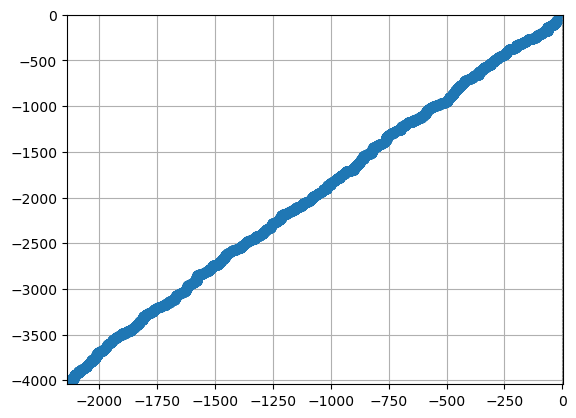

Final coordinates: ( -2138 , -4043 )
slope: 1.891019644527596


In [259]:
# Calculate the square root of 2 and convert it to a string
Q_Digits = createIrrationalDigits(10000, mpmath.sqrt(2))
# create the base4 digits string
base4_digits = CreateBase4DigitsString(Q_Digits)
# map the digits to the direction up(0), left(2), down(1), right(3)
mapped_directions = MapBase4DigitsAsDirections(base4_digits)
# show a graph for fun
final_x, final_y = CreateRandomWalkGraph(mapped_directions)

print("Final coordinates: (", final_x, ",", final_y, ")")
print(f"slope: {final_y / final_x}")

# Question 2 
### Chapter 5 - problem 8.
Consider a positive integer. Sort the decimal digits of this number in ascending and descending order. 

Calculate the difference of these two numbers (for example, starting from 5742 , we get $7542-2457=5085$ ). This is called the Kaprekar routine. 

First check that starting with any 4-digit number and repeating the Kaprekar routine, you always reach either 0 or 6174 . 

Then find out, among all the 4-digit numbers, what is the maximum number of iterations needed in order to get to 6174 .

In [265]:
n = 5472

def g(list):
    return int(''.join(map(str, list)))
    
numberOfIterations = 0
while n != 6174:
    n = [int(n) for n in str(n)]
    
    n_sorted = sorted(n)
    n_reversed = n_sorted[::-1]
    n = g(n_reversed) - g(n_sorted)
    
    numberOfIterations += 1
    print(n)

print(f"it took {numberOfIterations} loops to ")

5085
7992
7173
6354
3087
8352
6174
it took 7 loops to 


# Question 3

### Chapter 6 - problem 1

### Plot the graph of


$$
\begin{aligned}
& x(t)=4 \cos (-11 t / 4)+7 \cos (t) \\
& y(t)=4 \sin (-11 t / 4)+7 \sin (t)
\end{aligned}
$$

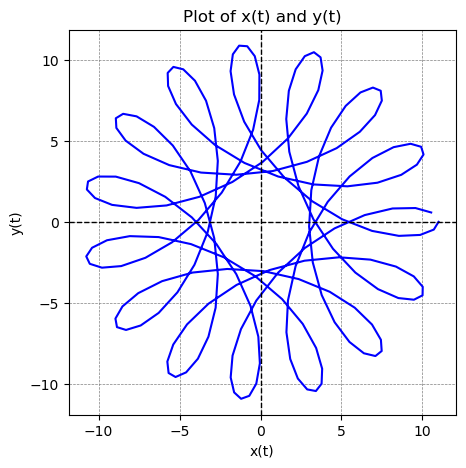

In [432]:
import numpy as np
import matplotlib.pyplot as plt

def x(t):
    return 4 * np.cos(-11 * t / 4) + 7 * np.cos(t)

def y(t):
    return 4 * np.sin(-11 * t / 4) + 7 * np.sin(t)
    
# length of plot..
#0 is starting point, 8*pi is interval (25.1327), 200 is number of samples 
t = np.linspace(0, 7.95*np.pi, 200)

# Changes the physical size of the graph
plt.figure(figsize=(5, 5))

# this creates the plot
plt.plot(x(t), y(t), color='b')

# titles and labeling
plt.title('Plot of x(t) and y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')

# these are the center axis lines
plt.axhline(0, color='black',linewidth=1, ls='--')
plt.axvline(0, color='black',linewidth=1, ls='--')
# the internal grid of the graph
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
# make the physical dimensions of graph equal
plt.axis('equal')
# shows the configured graph
plt.show()

# Question 4

### Chapter 7 - problem 4

Write function which accepts x and n and calculates
$$
1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\cdots \frac{1}{1+x}}}}
$$

where there are n division lines in the expression on the right. 

In [435]:
import sympy
from functools import reduce

x = sympy.symbols('x')

In [436]:
# Write function which accepts x and n
def recursive_fraction(x, n):
    while n != 1:
        return 1 + 1 / recursive_fraction(x, n - 1)
    return 1 + x; # the most inner equation

recursive_fraction(x, 5)

1 + 1/(1 + 1/(1 + 1/(1 + 1/(x + 1))))

### Can you write the code also using map and reduce.

In [437]:
# using the reduce way 

# the number of recursions, including the most inner equation
numberOfRecursions = 5
# this creates the list the reduce will generatively iterate over [x,1,1,1,1]
listOfrecuringExpressions = [x] + [1]*(numberOfRecursions-1)

# the reduce iteratice generator
1 + reduce( lambda x, n: 1 / (x + n), listOfrecuringExpressions )

1 + 1/(1 + 1/(1 + 1/(1 + 1/(x + 1))))

In [440]:
numberOfRecursions = 5
1 + reduce( lambda x, n: 1 / (x + n), map(lambda i: x if i == 0 else 1, range(numberOfRecursions)) )

1 + 1/(1 + 1/(1 + 1/(1 + 1/(x + 1))))

# Question 5

### Chapter 8 - problem 8

Plot the graph of the function

$$
f(x)= \begin{cases}-x, & \text { if }|x|<1 \\ \sum_{n=1}^{10} \sin \left(\frac{x}{n}\right), & \text { if } 1 \leq|x|<2 \\ \sum_{n=1}^{10} \cos \left(\frac{x}{n}\right), & \text { otherwise }\end{cases}
$$

In [499]:
import matplotlib.pyplot as plt
import math

In [500]:
def f(x):
    # if |x| < 1
    if abs(x) < 1:
        return -x
    # if 1 <= |x| < 2
    elif 1 <= abs(x) < 2:
        return sum(math.sin(x / n) for n in range(1, 11))
    # otherwise
    else:
        return sum(math.cos(x / n) for n in range(1, 11))

In [501]:
#xArray = np.arange(-4, 5, 1)
xAxisPoints = np.linspace(-4, 4, 10000)
results = np.array([f(x) for x in xAxisPoints])

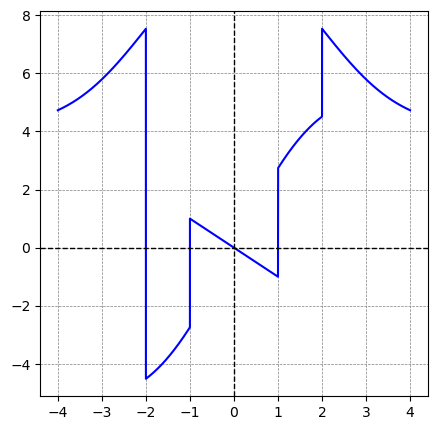

In [502]:
# Changes the physical size of the graph
plt.figure(figsize=(5, 5))

# this creates the plot
plt.plot(xAxisPoints, results, color='b')

# these are the center axis lines
plt.axhline(0, color='black',linewidth=1, ls='--')
plt.axvline(0, color='black',linewidth=1, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
# shows the configured graph
plt.show()

How many roots does $f(x)$ have in the interval $[-4,4]$ ?

According to https://simple.wikipedia.org/wiki/Root_of_a_function.  
In mathematics, a root of a function f is a number x that turns the value of f to 0:

This happens four times in our interval.